In [2]:
from sympy import symbols
from sympy import expand
import numpy as np

x = np.arange(0, 1.1, 0.1)
y = 1/(1+x**3)
print(x)


def c(x, k, n):
    c = 1
    x_sym = symbols('x')
    for i in range(n):
        if i is not k:
            c *= (x_sym - x[i])/(x[k] - x[i])
        else:
            continue
    return c

def L(x, y, n):
    L = 0
    for i in range(n):
        L += c(x, i, n)*y[i]
    return L

for i in range(2, 5):
    print(expand(L(x, y, i)))

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
1.0 - 0.00999000999000899*x
-0.296925296925309*x**2 + 0.0197025197025198*x + 1.0
-0.912940786358462*x**3 - 0.0230430610177734*x**2 + 0.0014437039753572*x + 1.0


In [17]:
from sympy import diff, lambdify

x = [4,4.1,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,6]
y = [0.77,0.75,0.68,0.65,0.61,0.58,0.55,0.52,0.499,0.48,0.45,0.43,0.42,0.39,0.38,0.37,0.35,0.34,0.33,0.30]

def f(x, y, ran):
    if len(ran) != 2:
        return (f(x, y, ran[1:]) - f(x, y, ran[:len(ran)-1]))/(x[ran[len(ran)-1]] - x[ran[0]])
    else:
        return (y[ran[1]] - y[ran[0]])/(x[ran[1]]-x[ran[0]])

def L(x, y, n):
    L = y[0]
    x_sym = symbols('x')
    for i in range(2, n+1):
        temp = 1
        for j in range(i-1):
            temp *= (x_sym - x[j])
        L += f(x, y, range(i))*temp
    return L

#for i in range(2, 7):
#    print(expand(L(x, y, i)))
x_sym = symbols('x')
error = []
for i in range(2, len(x)):
    l_lam = lambdify(x_sym, expand(L(x, y, i)))
    error.append(abs(0.7-l_lam(4.2)))
    print(l_lam(4.2))

error.sort()
print(error)

0.7299999999999958
0.7200000000000033
0.7166666666658017
0.7140000000090367
0.7106666661275085
0.7061905114678666
0.7003573542460799
0.6932988911867142
0.6856842041015625
0.6797404289245605
0.6751728057861328
0.7100448608398438
-1.08148193359375
35.462890625
381.875
464.0
2582.0
-205774.0
[0.00035735424607996613, 0.006190511467866644, 0.006701108813285783, 0.010044860839843794, 0.01066666612750855, 0.014000000009036784, 0.014315795898437456, 0.016666666665801744, 0.02000000000000335, 0.02025957107543941, 0.024827194213867143, 0.029999999999995808, 1.78148193359375, 34.762890625, 381.175, 463.3, 2581.3, 205774.7]


18*x**4/(x**3 + 1)**3 - 6*x/(x**3 + 1)**2
1.5719991638936377


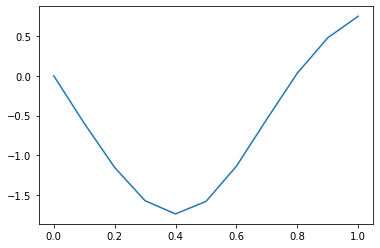

In [17]:
from sympy import diff, lambdify
import matplotlib.pyplot as plt

x = symbols('x')
y = 1/(1+x**3)
y_diff2 = diff(diff(y, x), x)
print(y_diff2)

x_val = np.arange(0, 1.1, 0.1)
y_lam = lambdify(x, y_diff2)
plt.plot(x_val, y_lam(x_val))

M = max(abs(y_lam(x_val[1:4])))
print(M)